<div style="text-align: center;">
    <h1>AI CA 6</h1>
</div>

<div style="text-align: center;">
    Farbod Azimmohseni 810100187
</div>

# Understanding Dataset
<font color='cyan'>Q1.</font> In an Imbalance dataset, density of one class might be low and they might not get clustered. On the other side many data samples of a class will create a heavy and dense area which make it more likely for centers to be there and we might miss some clusters. Finding if our data is unbalanced is usually a hard task because we dont know the label of our data. Furtheremore solving this problem is trickier than classification tasks. If you can determine the cluster with unbalanced data you can use undersampling or oversampling. Some algorithms are less sensitive to imbalanced data, in these cases using ensemble learning might be helpfull. There are some algorithms that you can assign weights to data in smaller clusters.

In [2]:
# !pip install hazm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from puncs import punctuation_list

In [4]:
classes = ['سیاسی', 'ورزشی','حوادث','فناوری','سلامت','فرهنگی/هنری']
label_mapping = {
    'سیاسی': 1,
    'ورزشی': 2,
    'حوادث': 3,
    'فناوری': 4,
    'سلامت': 5,
    'فرهنگی/هنری':6,
}
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
true_labels = test_df['label'].replace(label_mapping)
x_train = train_df.drop(columns=['label'])
x_test = test_df.drop(columns= ['label'])
train_df.head(10)

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
5,سلامت,مصرف میوه، یکی از راه های سالم برای کاهش وزن س...
6,سیاسی,رئیس جمهوری پیش‌بینی، پیشگیری و درمان آسیب‌های...
7,ورزشی,پرسپولیس با برتری ۲ بر صفر مقابل تراکتور، اختل...
8,ورزشی,مدیرعامل باشگاه استقلال گفت: برای گرفتن مجوز ح...
9,سیاسی,دبیرکل حزب اسلامی ایران زمین در واپسین دقایق م...


# Preproccessing

<font color='cyan'>Q2.</font> Stemming is a fast and efficient method to transform words to their root and remote any suffix or prefix. It uses some simple rules and only considers the word not the context and grammar so the result word mught not be valid. Lemmatizing is more accuarte and unlike stemming takes into acount grammar to give valid words. This method is complex and consumes more time than stemming.

In [5]:
from hazm import Normalizer, Lemmatizer,stopwords_list,word_tokenize

def stop_word_remover(s):
    stopwords = stopwords_list()
    tokens = word_tokenize(s)

    remainder = [token for token in tokens if token not in stopwords]
    remainder = [token for token in remainder if token not in punctuation_list]

    return ' '.join(remainder)


def preprocessing(df):
    df_copy = df.copy()
    normalizer = Normalizer()
    lemmatizer = Lemmatizer()
    df_copy = np.vectorize(stop_word_remover)(np.array(df_copy))
    df_copy = np.vectorize(normalizer.normalize)(df_copy)
    df_copy = np.vectorize(lemmatizer.lemmatize)(df_copy)
    return df_copy

    

In [6]:
normal_x_train = preprocessing(x_train)
normal_x_test = preprocessing(x_test)

In [7]:
print(normal_x_train[:1])

[['گزارش\u200cهای منتشر حاکی کاربران تلگرام مناطقی جهان اروپا خاورمیانه مشکل گزارش ایسنا نقل تلگرام دقایقی پیام\u200cرسان تلگرام صفحه توییتر اعلام دسترسی کاربران اپلیکیشن اروپا خاورمیانه مشکل پیام رسد منشا اختلالات ظهر امروز شنبه خارجی پیام\u200cرسان ارتباطی داخل کشور پیام\u200cرسان عنوان متخصصان تلگرام زمانی متوجه اختلالی بررسی برطرف مشکل مربوطه امید زودی اختلال رفع کاربران حساب\u200cهای کاربری تلگرام دسترسی یابند']]


In [8]:
# !pip install gensim

# Clustering

In [9]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from hazm import word_tokenize

doc_list = normal_x_train.tolist()

docs = [TaggedDocument(word_tokenize(doc[0]),[i]) for i,doc in enumerate(doc_list)]
Model = Doc2Vec(docs,vector_size=7, window=2, min_count=1)


In [10]:
vector = Model.infer_vector(["هوش"])
print(vector)

[ 0.11378121 -0.01034951 -0.12887676  0.12480461 -0.01259047  0.04284016
 -0.01844282]


In [11]:
def doc_to_vec(s):
    return Model.infer_vector(word_tokenize(s))


In [12]:
test_list = normal_x_test.tolist()
test_vectors = [doc_to_vec(sent[0]) for sent in test_list]

In [13]:
from sklearn.cluster import k_means
import numpy as np


centroids, k_means_pred_labels,interia = k_means(test_vectors,n_clusters=6)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [14]:
from sklearn.metrics.cluster import homogeneity_score,silhouette_score
print(f"homogeneity score of kmeans: {homogeneity_score(true_labels,k_means_pred_labels)}")
print(f"silhouette score of kmeans: {silhouette_score(test_vectors,k_means_pred_labels)}")


homogeneity score of kmeans: 0.44531240643242076
silhouette score of kmeans: 0.31686344742774963


[]

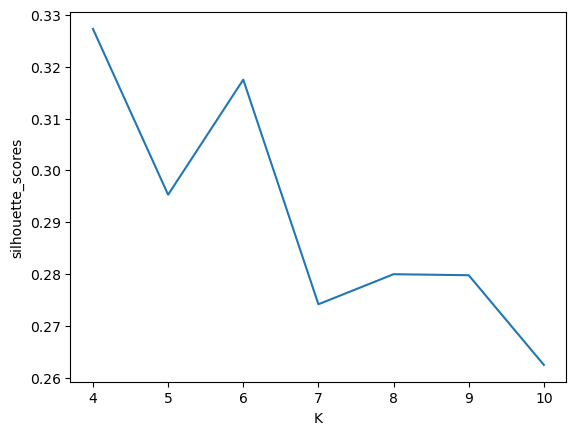

In [15]:
import warnings
warnings.filterwarnings('ignore')
silhouette_scores = []
k_s = []
for i in range(4,11):
    k_s.append(i)
    _, k_means_pred_labels,_ = k_means(test_vectors,n_clusters=i)
    silhouette_scores.append(silhouette_score(test_vectors,k_means_pred_labels))

plt.plot(k_s,silhouette_scores)
plt.ylabel("silhouette_scores")
plt.xlabel("K")
plt.plot()

In [35]:
from sklearn.cluster import DBSCAN

dbscan_pred_labels = DBSCAN(eps=0.995).fit_predict(test_vectors)
print(dbscan_pred_labels[:10])
print(f"homogeneity score of kmeans: {homogeneity_score(true_labels,dbscan_pred_labels)}")
print(f"silhouette score of kmeans: {silhouette_score(test_vectors,dbscan_pred_labels)}")




[-1 -1  0 -1  0  0 -1 -1 -1 -1]
homogeneity score of kmeans: 0.08390589006139193
silhouette score of kmeans: -0.0596148706972599


<font color='cyan'>Q3.</font> Woking with words, we need to find a way to represent them in a way that this transformation keeps the relation of the words in the new embedding. There is a famous example that for the words King, Queen, Man, and Woman, distance between king and man should be the same as queen and woman.

<img src="example.png" style="display: block; margin: 0 auto;">

<font color='cyan'>Q4.</font> Word2vec uses two methods to create word embeddings. Given the data it can make embeddings using words next to each other while considering relations. Word2vec uses two architectures, CBOW and Skip-Gram. In CBOW we choose a word as target and other near words as context and predict the target using context word vectors. Skip-Gram however does the opposite. It takes a word as input and tries to predict context words around it. It makes use of a sliding windows. The size of the windows is a hyperparamether. In the project I got better results with smaller windows sizes. The way Doc2Vec works is almost the same. It tries to find a fixed size feature vector for documents instead of words. In their CBOW for doc2vec they added a matrix for each documents that is used beside words to predict the target word. This way the document vector will also train. In their modified skip-gram, they give document vector as input and try to predict the words in the document. 

<font color='cyan'>Q5.</font> K-means and DBSCAN have both been disccused in the class, So I will not talk about the algorithms. K-means is really good when our clusters are in the form of circles. This algorithm is easy to implemnt and always converge. The probelm with this algorithms is its dependence to initial centroid positions and sensivity to outliers. Furthermore it does not work if our clusters are not in the form of spheres. 
DBSCAN is better because unlike k-means there is no limiting parameter k and the algorithm itself tries to find number of clusters. It can find complex clusters, for instance clusters surrounded by other clusters. Also it is robust to outliers. The problem is that in DBSCAN border points reachable from more than one cluster can assigned to any of them so the algorithm is not deterministic. The other thing is that performance of DBSCAN heavily depends on the choise of Epsilon paramether, Which sometimes might be difficult to set.

# PCA
<font color='cyan'>Q7.</font> PCA is a linear transformation used to compress data while maintaining the information in the original data. It uses variance in each feature among all the vectors. Feature with the most variance has the most imformation. The result of PCA is a compressed vector each containing some percent of variance of original vector.

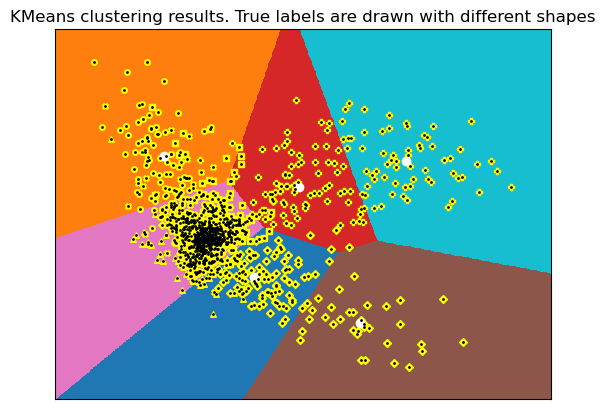

In [90]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
reduced_vectors = PCA(n_components=2).fit_transform(test_vectors)

h = 0.02
x_min, x_max = reduced_vectors[:, 0].min() - 1, reduced_vectors[:, 0].max() + 1
y_min, y_max = reduced_vectors[:, 1].min() - 1, reduced_vectors[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_vectors)
labels = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
labels = labels.reshape(xx.shape)
plt.figure(1)
plt.clf()
colors = ['tab:blue', 'tab:orange', 'tab:cyan', 'tab:red', 'tab:pink', 'tab:brown']
shapes = ['o', '^', 's', 'D', 'P', 'X']
for i, shape in enumerate(shapes):
    plt.scatter(reduced_vectors[true_labels == i+1, 0], reduced_vectors[true_labels == i+1, 1], color="yellow", marker=shape,s=16)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color="white")
plt.imshow(
    labels,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.colors.ListedColormap(colors),
    aspect="auto",
    origin="lower",
)
plt.plot(reduced_vectors[:, 0], reduced_vectors[:, 1], "k.", markersize=2)

# for i,shape in enumerate(shapes):
#     plt.plot([], [], marker=shape, label=f"{classes[i]}")
# plt.legend()

plt.xlim(x_min, x_max)
plt.title("KMeans clustering results. True labels are drawn with different shapes")
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


[]

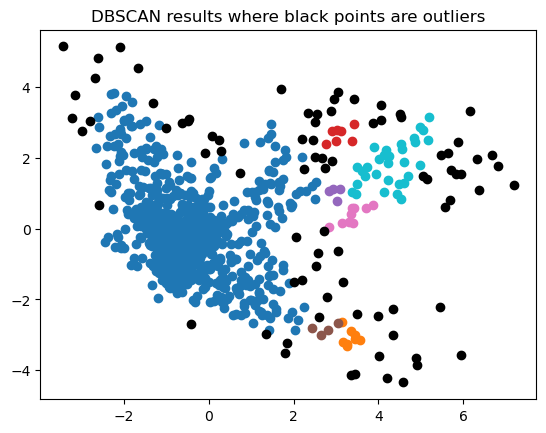

In [88]:
dbscan_colors = ['tab:blue', 'tab:orange', 'tab:cyan', 'tab:red', 'tab:pink', 'tab:brown','tab:purple','tab:yellow']
labels = DBSCAN(eps=0.4).fit_predict(reduced_vectors)
unique_labels = set(labels)

i = 0
for c in unique_labels:
    if (c == -1):
        plt.scatter(reduced_vectors[labels == c,0],reduced_vectors[labels == c,1],color="black")
    else:
        plt.scatter(reduced_vectors[labels == c,0],reduced_vectors[labels == c,1],color = dbscan_colors[i])
        i+=1
plt.title("DBSCAN results where black points are outliers")
plt.plot()




    



<font color='cyan'>Q6.</font> Kmeans can mostly cluster our test datset. Unfortunatly dbscan can not seperate the clusters really well because there is a dense area. The other problem with DBSCAN is the fact that I can not find the best hyperparamethers for the model.

# Results

<font color='cyan'>Q8.</font> Silhoute scores is used to find the best number of clusters. It computes a value for each point, showing how similar the point is to the points in its cluster compared to other clusters. It has a range between -1 to 1. High values shows that points are in right clusters and do not belong to other clusters. Lower values inicates that we have too many or too few clusters. This method does not use labels and Only considers clustering results. However homogenity score uses true labels. It measures what ratio of data truly in the same cluster are also in the same clusters in model's prediction. It has a range between 0 and 1 where 1 shows perfect match.

<font color='cyan'>Q10.</font> The problem with our model is basically the embeddings. It looks like our corpus is not large enough and doc2vec can not extract decent features from them. To enhance the model we may need a larger training dataset because our kmeans algorithm is not giving bad scores.